In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps
import numpy as np
import os

(60000, 28, 28) (60000,)
(60000, 784) (60000, 10)


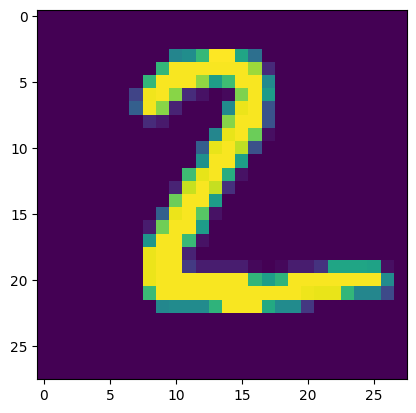

In [3]:
#데이터 준비
(독립, 종속), (독립2, 종속2) = tf.keras.datasets.mnist.load_data()
print(독립.shape, 종속.shape)

독립r = 독립.reshape(60000, 784)
독립2r = 독립2.reshape(10000, 784)
종속 = pd.get_dummies(종속)
print(독립r.shape, 종속.shape)
plt.imshow(독립2[1])

In [4]:
#모델 만들기
X = tf.keras.layers.Input(shape=[784])
H = tf.keras.layers.Dense(84, activation='swish') (X)
Y = tf.keras.layers.Dense(10, activation='softmax') (H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [9]:
#모델 학습하기
model.fit(독립r, 종속, epochs=10)

#모델 구조 확인
#model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 84)                65940     
                                                                 
 dense_1 (Dense)             (None, 10)                850       
                                                                 
Total params: 66790 (260.90 KB)
Trainable params: 66790 (260.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
image_list = []
image_listR = []
gray_image_list = []
gray_image_listR = []
inverted_gray_image_list = []
inverted_gray_image_listR = []

def ImageSetting(file_name, number):
    image_path = os.path.join(os.getcwd(), file_name)
    image = Image.open(image_path)
    gray_image = image.convert('L')
    inverted_gray_image = ImageOps.invert(gray_image)
    image_array = np.array(image)
    gray_image_array = np.array(gray_image)
    inverted_gray_image_array = np.array(inverted_gray_image)
    image_arrayR = image_array.reshape(1, 784)
    gray_image_arrayR = image_array.reshape(1, 784)
    inverted_gray_image_arrayR = inverted_gray_image_array.reshape(1, 784)

    image_list.insert(number, image_array)
    image_listR.insert(number, image_arrayR)
    # image_listR[number] = image_arrayR
    # gray_image_list[number] = gray_image_array
    # gray_image_listR[number] = gray_image_arrayR
    # inverted_gray_image_list[number] = inverted_gray_image_list
    # inverted_gray_image_listR[number] = inverted_gray_image_arrayR




In [7]:
#모델 이용
loss, accuracy = model.evaluate(독립r, 종속)

# image1_path = os.path.join(os.getcwd(), '1.png')
# image2_path = os.path.join(os.getcwd(), '1.png')
# image6_path = '/Users/ddoram/Desktop/6.png'

# image1 = Image.open(image1_path)
# image2 = Image.open(image2_path)

# gray_image1 = image1.convert('L')
# #gray_image.show()
# image1_array = np.array(image1)
# gray_image1_array = np.array(gray_image1)
# image1_arrayR = image1_array.reshape(1, 784)
# gray_image1_arrayR = gray_image1_array.reshape(1, 784)
#  #반전된 이미지
# inverted_gray_image1 = ImageOps.invert(gray_image1)
# inverted_gray_image1_array = np.array(inverted_gray_image1)
# inverted_gray_image1_arrayR = inverted_gray_image1_array.reshape(1, 784)
# #print(gray_image_arrayR)
# image_list = [inverted_gray_image1_array, image1_array]
# image_listR = [inverted_gray_image1_arrayR, image1_arrayR]

# #print(image_array)

ImageSetting('1.png', 0)
ImageSetting('2.png', 1)
pred = model.predict(image_listR[1])
print("정확도: ",accuracy) #<--- 정확도 출력 방법 찾아보기
pd.DataFrame(pred).round(2)
#plt.imshow(image_list[0])
#print("값은: ", 종속)

1/1 [==============================] - 0s 188ms/step
정확도:  0.962066650390625


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.02,0.96,0.01,0.0,0.0,0.0,0.02,0.0,0.0


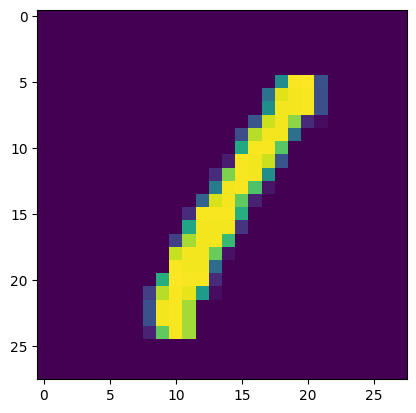

In [8]:
#print(종속[0:100])
plt.imshow(독립[3])
#image_arrayR = image_array.reshape(3136, 784)
#print(gray_image_array)
